# Name - OJASWEE
# Roll no. - 19211
_____
_____
_____

## Importing the necessary libraries

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Importing and cleaning the dataset

In [127]:
training_data=pd.read_csv(r"C:\Users\ojoja\Desktop\works\DSML project 1\train_data.csv", header=None)
training_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,561,562
0,NaN,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
1,356.0,0.28643265,-0.023842891,-0.12273754,-0.91558377,-0.71079378,-0.88022592,-0.93242863,-0.72031385,-0.8816573,...,-0.35777204,-0.75258188,-0.21750239999999998,0.22982607,0.15479147,-0.43113428,-0.761361,0.25057955,-0.046895310999999995,3
2,4482.0,0.33325764,-0.0013074393,-0.16658065,-0.034498107,-0.062471418,-0.28326757,-0.059697907,-0.17491186,-0.33866078,...,0.30832381,0.048713095,-0.19136029,-0.58031567,-0.42381023,0.68959733,-0.76546931,0.23737144,-0.06777138099999999,22
3,10012.0,0.26679666,-0.018683215,-0.10114222,-0.9908738000000001,-0.98900112,-0.98725473,-0.99165911,-0.98785924,-0.98542987,...,-0.38844176,-0.7035769000000001,-0.15260086,0.16209136,-0.62805232,0.55179469,0.58776753,-0.53650829,-0.46919277,24
4,4386.0,0.27636266,-0.020289165,-0.11370088,-0.99573283,-0.93909382,-0.98441757,-0.99701297,-0.93617989,-0.98372783,...,0.054211777999999995,-0.43075346,0.029985649,-0.094248447,0.025219245,-0.4080699,-0.81922672,0.21379382,-0.031300688,22


In [128]:
#dropping the first row 
training_data = training_data.drop(labels=0, axis=0)
training_data

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,561,562
1,356.0,0.28643265,-0.023842891,-0.12273754,-0.91558377,-0.71079378,-0.88022592,-0.93242863,-0.72031385,-0.8816573,...,-0.35777204,-0.75258188,-0.21750239999999998,0.22982607,0.15479147,-0.43113428,-0.761361,0.25057955,-0.046895310999999995,3
2,4482.0,0.33325764,-0.0013074393,-0.16658065,-0.034498107,-0.062471418,-0.28326757,-0.059697907,-0.17491186,-0.33866078,...,0.30832381,0.048713095,-0.19136029,-0.58031567,-0.42381023,0.68959733,-0.76546931,0.23737144,-0.06777138099999999,22
3,10012.0,0.26679666,-0.018683215,-0.10114222,-0.9908738000000001,-0.98900112,-0.98725473,-0.99165911,-0.98785924,-0.98542987,...,-0.38844176,-0.7035769000000001,-0.15260086,0.16209136,-0.62805232,0.55179469,0.58776753,-0.53650829,-0.46919277,24
4,4386.0,0.27636266,-0.020289165,-0.11370088,-0.99573283,-0.93909382,-0.98441757,-0.99701297,-0.93617989,-0.98372783,...,0.054211777999999995,-0.43075346,0.029985649,-0.094248447,0.025219245,-0.4080699,-0.81922672,0.21379382,-0.031300688,22
5,3751.0,0.26823055,-0.0041461452000000005,-0.094502785,0.47312327,0.45240296,-0.15260038,0.450082,0.48276443,-0.23938305,...,-0.13963925,-0.55854963,0.27837241,0.36323953,0.88543165,0.84841376,-0.7797605,0.24938377,0.03548351,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,8324.0,0.270511,-0.011321,-0.111377,-0.988057,-0.961229,-0.951407,-0.989752,-0.958753,-0.96505,...,-0.250141,-0.615815,-0.35349,-0.081501,0.181517,-0.180534,0.65869,-0.091334,0.961636,10
8236,10206.0,0.260897,-0.017322,-0.103011,-0.988656,-0.990926,-0.989076,-0.989816,-0.990775,-0.988472,...,-0.255976,-0.667159,-0.079052,-0.107393,-0.547206,0.564335,0.435081,-0.503752,-0.485656,24
8237,6253.0,0.278648,-0.020038,-0.11859,-0.983932,-0.912261,-0.955945,-0.98713,-0.917041,-0.957747,...,0.354233,0.146016,-0.068825,-0.060211,-0.727493,-0.655778,-0.795575,0.238281,-0.000787,28
8238,10123.0,0.283642,-0.006992,-0.129778,-0.994152,-0.954562,-0.951844,-0.995321,-0.955989,-0.944934,...,-0.586855,-0.881097,-0.051389,-0.015944,-0.759481,-0.805523,-0.86431,0.188362,0.044799,24


In [129]:
# converting all the values to float from string
training_data = training_data.astype(float)
training_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,561,562
1,356.0,0.286433,-0.023843,-0.122738,-0.915584,-0.710794,-0.880226,-0.932429,-0.720314,-0.881657,...,-0.357772,-0.752582,-0.217502,0.229826,0.154791,-0.431134,-0.761361,0.250580,-0.046895,3.0
2,4482.0,0.333258,-0.001307,-0.166581,-0.034498,-0.062471,-0.283268,-0.059698,-0.174912,-0.338661,...,0.308324,0.048713,-0.191360,-0.580316,-0.423810,0.689597,-0.765469,0.237371,-0.067771,22.0
3,10012.0,0.266797,-0.018683,-0.101142,-0.990874,-0.989001,-0.987255,-0.991659,-0.987859,-0.985430,...,-0.388442,-0.703577,-0.152601,0.162091,-0.628052,0.551795,0.587768,-0.536508,-0.469193,24.0
4,4386.0,0.276363,-0.020289,-0.113701,-0.995733,-0.939094,-0.984418,-0.997013,-0.936180,-0.983728,...,0.054212,-0.430753,0.029986,-0.094248,0.025219,-0.408070,-0.819227,0.213794,-0.031301,22.0
5,3751.0,0.268231,-0.004146,-0.094503,0.473123,0.452403,-0.152600,0.450082,0.482764,-0.239383,...,-0.139639,-0.558550,0.278372,0.363240,0.885432,0.848414,-0.779760,0.249384,0.035484,19.0


In [130]:
#checking if the data contains any null values
training_data.isnull().values.any()

False

In [131]:
# Importing the classes
training_data_classes=pd.read_csv(r"C:\Users\ojoja\Desktop\works\DSML project 1\train_labels.csv", header=None)
training_data_classes.head(5)

,0,1
0,NaN,Activity
1,356.0,STANDING
2,4482.0,WALKING
3,10012.0,LAYING
4,4386.0,STANDING


In [132]:
#dropping the first row 
training_data_classes = training_data_classes.drop(labels=0, axis=0)
training_data_classes.head(5)

,0,1
1,356.0,STANDING
2,4482.0,WALKING
3,10012.0,LAYING
4,4386.0,STANDING
5,3751.0,WALKING_DOWNSTAIRS


In [133]:
#checking if the data contains any null values
training_data_classes.isnull().values.any()

False

In [134]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8239 entries, 1 to 8239
Columns: 563 entries, 0 to 562
dtypes: float64(563)
memory usage: 35.5 MB


In [135]:
training_data_classes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8239 entries, 1 to 8239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8239 non-null   float64
 1   1       8239 non-null   object 
dtypes: float64(1), object(1)
memory usage: 193.1+ KB


## Plotting the given classses

In [136]:
count_of_each_activity = np.array(training_data_classes.iloc[:,1].value_counts())
activities = sorted(training_data_classes.iloc[:,1].unique())

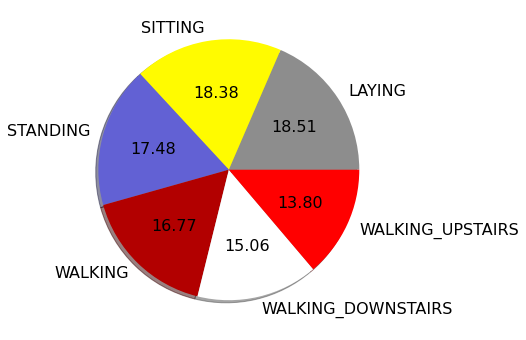

In [137]:
# Plotting a pie chart
plt.rcParams.update({'figure.figsize': [6, 6], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f', shadow= True, colors=['#8D8D8D', '#FFFB00', '#6261D4', '#B20000','#FFFFFF','#FF0000'], textprops={'fontsize': 16})
plt.show()

## Dividing the data

In [138]:
def process_dataset(prefix=''):
    x = training_data.iloc[:,0:]
    y = training_data_classes.iloc[:,1:].values.ravel()
    # split the dataset
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    return X_train, y_train, X_test, y_test
# load dataset
X_train, y_train, X_test, y_test = process_dataset()

(5767, 563) (5767,) (2472, 563) (2472,)


## Defining all the Models

In [139]:
# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
    # nonlinear models
    models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=7)
    models['Random Forest'] = RandomForestClassifier(n_estimators = 100)
    models['Logistic Regression'] = LogisticRegression()
    models['Naive Bayes'] = GaussianNB()
    return models

## Defining a function to evaluate a model 

In [140]:
# evaluating a single model
def evaluate_model(X_train, y_train, X_test, y_test, model):
    # fit the model
    model.fit(X_train, y_train)
    # make predictions
    yhat = model.predict(X_test)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    return accuracy * 100.0

## Defining a function to print the results 

In [141]:
# evaluate a dict of models {name:object}, returns {name:score}
def results(X_train, y_train, X_test, y_test, models):
    results = dict()
    for name, model in models.items():
        # evaluate the model
        results[name] = evaluate_model(X_train, y_train, X_test, y_test, model)
        # show process
        print('--> Accuracy using %s= %.3f' % (name, results[name]))
    return results
results = evaluate_models(X_train, y_train, X_test, y_test, models)

--> Mean accuracy using K-Nearest Neighbor= 96.278
--> Mean accuracy using Random Forest= 97.735
--> Mean accuracy using Logistic Regression= 79.854
--> Mean accuracy using Naive Bayes= 82.888
--> Mean accuracy using Support Vector Machine= 17.557
